Aulas 2 e 3 - Coleta, Organização, Limpeza e Imputação de Dados
===============================================================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Antes de começar:
 - Caso seu ambiente Anaconda não possua uma das dependências necessárias para a execução do código contigo neste notebook, abra uma célula e execute o comando: ```!pip install -r ../requirements.txt```

Neste módulo vamos aprender sobre:
 1. **Como carregar dados de diferentes formatos em memória no nosso ambiente de desenvolvimento;**
 2. **Análise Exploratória;**
 3. **Tratamento de Dados;**
 4. **Imputação de dados;**
 5. **Normalização e estandardização de variáveis contínuas;**

In [1]:
################
# Emerson Adam #
################

In [2]:
!pip install -r ../requirements.txt

1 - Carregando dados no ambiente de desenvolvimento
=============================================

No dia a dia de trabalho, um **Cientista de Dados** se depara com diferentes tipos fontes de dados. Nem sempre, em sua equipe, haverá um **Engenheiro de Dados** disponível para te ajudar a coletar dados de interesse em um formato fácil de integração com seu ambiente de desenvolvimento Python (ou qualquer outro ambiente de desenvolvimento científico), no nosso caso, o Jupyter Notebook. Portanto, é fundamental que você domine os principais formatos e/ou fontes existentes no mercado, para que não dependa de um terceiro para uma rápida prototipação/experimentação.

As principais fontes de dados, encontradas por um profissional da área, são:
 - Arquivos .csv;
 - Arquivos .json;
 - Arquivos .parquet;
 - Base de dados relacional SQL;
 - Base de dados não relacional NoSQL;

Em empresas que seguem a filosofia **Data Driven** haverá, usualmente, uma pedaço de Software chamado de *Camada de Ingestão de Dados*. Esta camada, desenvolvida por **Engenheiros de Dados**, tem por objetivo centralizar diversas fontes de informação bruta (arquivos csv, json, parquet, imagens, audios, etc ...) em um único repositório (ou **Buckets**). Este repositório centralizado recebe o nome de **Data Lake**, e é o ponto de partida para processos de ETL (*Extract, Transform and Load*), e também a forma mais fácil de um **Cientista de Dados** se servir de dados.

A consulta à base de dados SQL/NoSQL está fora do escopo deste módulo, contudo, com o domínio da linguagem Python para o processamento dos principais tipos de arquivo citados acima, . Tampouco trabalharemos, neste módulo, com processamento de imagens/audio.

1.1 - Arquivo .csv
----------------------

A existência de arquivos *csv* em **Data Lakes** não é predominante, pois, apesar de ser um arquivo fácil de se manipular, não é o mais eficiente (redução de espaço em disco e otimização de tempo de leitura). Entretanto, é o tipo de arquivo mais encontrado quando a informação ainda não está disponível no **Data Lake** (exportação de planilhas Excel, base de dados do IBGE, entre outras).

O arquivo csv é o melhor amigo do Pandas. Para carregar um arquivo em memória, utilizamos a função `read_csv`

```
dataset = pd.read_csv("caminho/do/arquivo.csv")
```

In [3]:
import pandas as pd

dados_csv = pd.read_csv("dados_brutos.csv")
dados_csv.head()

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0  RJ  Tipo 1   Localidade 4  0.620648   9.967806  4.990882  25.124844  \
1  SP  Tipo 2   Localidade 4  0.817642  12.629695  5.466835  23.444343   
2  RJ  Tipo 2   Localidade 3  0.793080  11.292156  4.201919  28.230731   
3  SC  Tipo 1   Localidade 4  0.792435  11.563047  5.459777  22.414837   
4  RN  Tipo 1   Localidade 3  0.711696  11.655785  4.891314  25.451251   

      loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
0  0.081382  0.727021           3603.941384            2002.686030  \
1  0.367980  0.145812           2185.209139             683.811862   
2  0.332654  0.432904           1025.698339             957.451552   
3  0.159663  0.884596                   NaN            3723.067390   
4  0.156154  0.836320           3925.306331             705.807343   

   escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
0          1124.043113            0.0             0.0           NaN  123.0  \
1          2462.825432            0.0             0.0          13.0  143.0   
2          1049.112117            0.0             0.0          12.0  150.0   
3          1296.121182            0.0             0.0           8.0  160.0   
4          4178.062758            0.0             0.0          12.0  134.0   

     preco  
0  1348017  
1   926601  
2  1627474  
3  1201041  
4  1444848

1.2 - Arquivo .json
------------------------

É o formato mais utilizado por **Engenheiros de Software**, devido à sua compatibilidade com as tecnologias de desenvolvimento de APIs da atualidade. Consequentemente, a quantidade de arquivos *json* em **Data Lakes** é volumosa.

No *Pandas*, importa-se um arquivo *json* utilizando o comando `read_json`

In [4]:
dados_json = pd.read_json("dados_brutos.json")
dados_json.head()

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
700  ES  Tipo 1           None  0.638824  10.158127  4.874347  26.151255  \
701  SP  Tipo 2   Localidade 4  0.794100  11.467263  4.889458  25.737262   
702  MS  Tipo 1   Localidade 4  0.745027  11.088365  4.644014  26.165747   
703  PR  Tipo 1   Localidade 1  0.773947  12.182951  5.778339  21.948647   
704  RO  Tipo 2   Localidade 1  0.686853  10.321383  4.589251  27.254870   

        loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
700  0.632733  0.481356            341.680530            3456.862812  \
701  0.290362  0.649488           3121.658324            2711.257761   
702  0.117298  0.131615           1808.463617            1178.930223   
703  0.521053  0.021927           4189.517081            6402.599591   
704  0.985792  0.744716            385.176751            1630.761705   

     escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
700          2557.124996            0.0             0.0          37.0    NaN  \
701          2635.042549            0.0             0.0           4.0  151.0   
702          1231.387072            0.0             NaN          15.0  170.0   
703          1738.502238            0.0             0.0           8.0   84.0   
704          3446.457453            0.0             0.0          20.0  168.0   

       preco  
700  1329074  
701   980660  
702  1044861  
703  1347838  
704   751177

1.3 - Arquivo .parquet
-------------------------------

É um formato de armazenamento colunar, disponível em todos os projetos do ecossistema *Hadoop*.
Em suma, um arquivo *parquet* permite armazenar e consultar o arquivo de forma eficiênte, o que justifica seu emprego na construção de **Data Lakes**.

https://parquet.apache.org/

A API do *Pandas* é intuitiva! Para carregar um arquivo *parquet*, utilizamos o método `pd.read_parquet` 

In [5]:
dados_parquet = pd.read_parquet("dados_brutos.parquet")
dados_parquet.head()

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0  DF  Tipo 1   Localidade 1  0.865418  12.469136  4.428843  28.599545  \
1  SC  Tipo 1   Localidade 2  0.794821  11.643225  5.745631  20.793361   
2  MG  Tipo 2   Localidade 1  0.765382  11.246786  4.435433  27.697589   
3  SP  Tipo 2   Localidade 1  0.742807  10.807940  4.510181  28.549110   
4  DF  Tipo 1   Localidade 4  0.708509  10.182098  5.581803  22.486957   

      loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
0  0.039081  0.967402           6424.017248            2312.613264  \
1  0.163092  0.150923           1390.553671            7062.080907   
2  0.519452  0.083601                   NaN            5795.794123   
3  0.094447  0.229071           2811.748941            5112.857979   
4  0.398567  0.594843           3362.149025            1685.887551   

   escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
0           922.096367            0.0             0.0           9.0   60.0  \
1          6311.945099            0.0             0.0           6.0  135.0   
2          1406.914318            0.0             0.0          17.0  162.0   
3          1954.494335            1.0             0.0           3.0  105.0   
4          1600.735664            0.0             0.0           5.0  137.0   

     preco  
0  1283960  
1   691992  
2  1042605  
3  1132298  
4  1133084

1.4 - Exercício
---------------

Os dados da aula de hoje foram divididos em três arquivos, os quais carregamos nas células anteriores. Pesquise na documentação do *Pandas* como unir as linhas dos *dataframes* `dados_csv`, `dados_json` e `dados_parquet`, e um novo *dataframe* nominado `dados`.

https://pandas.pydata.org/docs/reference/index.html#api

Dica: **Concatenar** é a palavra chave de pesquisa

In [6]:
# Substitua a igualdade abaixo por uma que empilhe as linhas dos três conjuntos de 
# dados que carregamos anteriormente em apenas um conjunto de dados denominado `dados`
####dados = dados_csv.copy()

dados = pd.concat([dados_csv, dados_json, dados_parquet]).reset_index(drop=True)
dados

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0     RJ  Tipo 1   Localidade 4  0.620648   9.967806  4.990882  25.124844  \
1     SP  Tipo 2   Localidade 4  0.817642  12.629695  5.466835  23.444343   
2     RJ  Tipo 2   Localidade 3  0.793080  11.292156  4.201919  28.230731   
3     SC  Tipo 1   Localidade 4  0.792435  11.563047  5.459777  22.414837   
4     RN  Tipo 1   Localidade 3  0.711696  11.655785  4.891314  25.451251   
...   ..     ...            ...       ...        ...       ...        ...   
2022  SC  Tipo 2   Localidade 4  0.923722  13.940390  5.222921  24.202279   
2023  PR  Tipo 2   Localidade 4  0.621180   9.638953  4.872834  26.311889   
2024  ES  Tipo 1   Localidade 3  0.702689  10.906394  5.002910  24.681539   
2025  SC  Tipo 1         Tipo 3  0.840306  12.612464  5.191198  23.653668   
2026  CE  Tipo 2   Localidade 1  0.780135  11.537751  4.873889  26.015937   

         loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
0     0.081382  0.727021           3603.941384            2002.686030  \
1     0.367980  0.145812           2185.209139             683.811862   
2     0.332654  0.432904           1025.698339             957.451552   
3     0.159663  0.884596                   NaN            3723.067390   
4     0.156154  0.836320           3925.306331             705.807343   
...        ...       ...                   ...                    ...   
2022  0.047978  0.106754           1835.793637            1085.880075   
2023  0.146383  0.696719           3241.890776            1942.810024   
2024  0.998298  0.747620           3207.183221            1425.618869   
2025  0.565233  0.801478           2574.736799            1223.924147   
2026  0.835390  0.302851           4390.423348            2626.528938   

      escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
0             1124.043113            0.0             0.0           NaN  123.0  \
1             2462.825432            0.0             0.0          13.0  143.0   
2             1049.112117            0.0             0.0          12.0  150.0   
3             1296.121182            0.0             0.0           8.0  160.0   
4             4178.062758            0.0             0.0          12.0  134.0   
...                   ...            ...             ...           ...    ...   
2022          1389.476784            0.0             0.0           3.0  160.0   
2023          1713.583735            0.0             0.0           6.0   88.0   
2024          1571.548396            0.0             0.0          40.0   97.0   
2025           150.881637            0.0             0.0          43.0  128.0   
2026          1230.964520            0.0             0.0           5.0  119.0   

        preco  
0     1348017  
1      926601  
2     1627474  
3     1201041  
4     1444848  
...       ...  
2022   889177  
2023   863004  
2024  1322275  
2025  1170550  
2026   791071  

[2027 rows x 17 columns]

2 - Análise exploratória
===================

Agora que carregamos os dados no *notebook*, precisamos explorá-los para encontrar eventuais inconsistências.
No dia a dia de trabalho de um *Cientista de Dados*, é muito comum encontrar:
 - Campos nulos (NaN);
 - Variáveis nominais não padronizadas (ex: "MAÇA", "maça", "MACA", "Maca ");
 - Variáveis contínuas (intervalar ou de razão) fora de escala;
 - Preenchimento incorreto de campos (ex: Espera-se nome da fruta, mas campo foi preenchido com o nome da cor);
 
Dentre as etapas do processo de **Mineração de Dados**, a *limpeza* do conjunto de dados é a que despende maior tempo, e que tem papel chave quanto ao sucesso do projeto. Por quê? Como veremos adiante, alguns algoritmos de *Aprendizado de Máquina* são gulosos, ou seja, encontrarão uma resposta até mesmo para os ruídos presentes no seu conjunto de treinamento (conceito de *Overfitting*).

Vamos começar identificando que variáveis existem no conjunto, e seus respectivos tipos, utilizando os comandos:
  - `dtypes`: para verificar o tipo de cada coluna;
  - `sample(N)`: para coletar uma pequena amostra que pode nos ajudar a sanar dúvidas sobre os tipos;

In [7]:
dados.dtypes

uf                        object
tipo                      object
cod_localidade            object
feat_1                   float64
feat_2                   float64
feat_3                   float64
feat_4                   float64
loc_x                    float64
loc_y                    float64
mercado_mais_proximo     float64
farmacia_mais_proxima    float64
escola_mais_proxima      float64
num_penit_4km            float64
num_penit_500m           float64
idade_imovel             float64
area                     float64
preco                      int64
dtype: object

In [8]:
dados.sample(5).T

582           808           1768          1013   
uf                               SC            PB            RN            PR  \
tipo                         tipo 1        Tipo 2        Tipo 2        Tipo 1   
cod_localidade         Localidade 4  Localidade 2  Localidade 2  Localidade 3   
feat_1                     0.686753       0.87667      0.659727      0.913961   
feat_2                    10.050881     13.523184       9.86613     13.854392   
feat_3                     4.158347       4.88917      4.786866      4.816805   
feat_4                    29.652812     25.813896     26.622446     26.062917   
loc_x                      0.653069      0.358686      0.349193      0.425755   
loc_y                      0.629251      0.889581      0.302457      0.523084   
mercado_mais_proximo    5219.675055   5191.928882   2004.674368    381.606467   
farmacia_mais_proxima    883.661559   2071.331278   4886.001062   1509.885204   
escola_mais_proxima     1580.306158   2639.354889   3990.300708    1643.60235   
num_penit_4km                   1.0           1.0           0.0           0.0   
num_penit_500m                  0.0           0.0           0.0           0.0   
idade_imovel                    9.0          11.0           5.0          37.0   
area                           73.0         201.0         116.0          86.0   
preco                       1190149        554783        550833       1278411   

                               1501  
uf                               GO  
tipo                         Tipo 2  
cod_localidade         Localidade 4  
feat_1                     0.774042  
feat_2                    12.317984  
feat_3                     4.940477  
feat_4                    24.922155  
loc_x                      0.616695  
loc_y                      0.786052  
mercado_mais_proximo    6262.849969  
farmacia_mais_proxima   1725.770761  
escola_mais_proxima     3181.185579  
num_penit_4km                   1.0  
num_penit_500m                  0.0  
idade_imovel                    9.0  
area                           95.0  
preco                        721065

Nosso conjunto de dados representa uma base imobiliária, e é formado pelas seguintes colunas:

| Nome                  | Descrição                                                             | Tipo               |
| ------------------    | ------------------------------------------------------                | ------------------ |
| uf                    | O estado onde o imóvel está localizado                                | object (string)    |
| tipo                  | O tipo do imóvel                                                      | object (string)    |
| cod_localidade        | Código qualitativo da localidade do imóvel (Consultoria)              | object (string)    |
| feat_1                | Feature 1 (Consultoria)                                               | float64            |
| feat_2                | Feature 2 (Consultoria)                                               | float64            |
| feat_3                | Feature 3 (Consultoria)                                               | float64            |
| feat_4                | Feature 4 (Consultoria)                                               | float64            |
| loc_x                 | Coordenada x do imóvel em um mapa local de referência (Consultoria)   | float64            |
| loc_y                 | Coordenada y do imóvel em um mapa local de referência (Consultoria)   | float64            |
| mercado_mais_proximo  | Distância do mercado mais próximo, em metros                          | float64            |
| farmacia_mais_proxima | Distância da farmácia mais próxima, em metros                         | float64            |
| escola_mais_proxima   | Distância da escola mais próxima, em metros                           | float64            |
| num_penit_4km         | Número de penitenciárias em um raio de 4km do imóvel                  | int64              |
| num_penit_500m        | Número de penitenciárias em um raio de 500m do imóvel                 | int64              |
| idade_imovel          | Idade do imóvel                                                       | int64              |
| area                  | Área do imóvel, em $m^2$                                              | float64            |
| preco                 | O preço do imóvel, em R$                                              | int64              |

* O tipo `int64`, no *Python*, representa o conjunto dos números naturais $\mathbb{N}$
* O tipo `float64`, no *Python*, representa o conjunto dos números reais $\mathbb{R}$
* O tipo `object`, no *Python*, pode representar uma **string** ou uma estrutura de dados composta (`list`, `dict`, classes customizadas, entre outras)

As variáveis `cod_localidade`, `feat_1`, `feat_2`, `feat_3`, `feat_4`, `loc_x` e `loc_y` foram elaboradas por um time de consultoria externa especializada em avaliação imobiliária. Sabemos que os códigos de qualidade contidos na coluna `cod_localidade` são utilizados para segmentar subregiões em níveis de qualidade, contudo, não sabemos se as categorias podem ser interpretadas como variáveis ordinais. Quanto às variáveis numéricas intervalares (`feat_1` à `feat_4`), sabe-se apenas que foram construídas com base em laudos históricos de avaliação de imóveis próximos, e com base em indicadores macro-econômicos.

Não existe uma receita de bolo exata para tratamento de dados, uma vez que a natureza e as regras de negócio variam muito de problema à problema. Para este caso de estudo, vamos começar verificando o conteúdo das variáveis de tipo `object` (assumindo como premissa de que são categoricas). Como já sabemos que estes campos estão armazenando valores do tipo `string`, uma boa pergunta inicial seria: Quais os possíveis valores destes campo?

Para responder a esta pergunta, podemos utilizar a função `unique`:

In [9]:
# Valores únicos de UF (incluíndo valores nulos, i.e., NaN)
dados.uf.unique()

array(['RJ', 'SP', 'SC', 'RN', 'CE', 'MG', 'ES', 'RO', 'DF', 'MS', 'PR',
       'GO', 'AC', 'BA', 'MT', 'AL', 'RS', 'PB', 'TO', 'AM', 'AP', 'SE',
       'RR', 'PI', 'MA', 'PE', 'PA', nan, None], dtype=object)

In [10]:
# Valores únicos de tipo
dados.tipo.unique()

array(['Tipo 1', 'Tipo 2', 'TIPO 1', 'tipo 2', nan, 'TIPO 2',
       'LOCALIDADE 6', 'Localidade 9', 'Localidade 8', 'tipo 1',
       'Localidade 6', 'Tipo 3', 'Tipo 4', None, 'Localidade 10',
       'Localidade 5', 'TIPO 4', 'tipo 3', 'Localidade 7'], dtype=object)

In [11]:
# Valores únicos de localidade
dados.cod_localidade.unique()

array(['Localidade 4', 'Localidade 3', 'localidade 4', 'Localidade 2',
       'Localidade 9', 'Localidade 1', 'Localidade 7', 'localidade 3',
       'LOCALIDADE 2', 'localidade 1', 'LOCALIDADE 1', nan,
       'Localidade 8', 'Tipo 3', 'localidade 2', 'LOCALIDADE 3',
       'localidade 9', 'LOCALIDADE 4', 'Tipo 2', 'Localidade 5',
       'Localidade 6', None, 'localidade 5', 'Tipo 4', 'Localidade 10',
       'tipo 4', 'localidade 7'], dtype=object)

In [12]:
dados.describe().T

count           mean            std            min   
feat_1                 2022.0       0.751808       0.103431       0.222897  \
feat_2                 2022.0      11.304705       1.654269       3.067246   
feat_3                 2016.0       5.004588       0.514403       3.214858   
feat_4                 2023.0      24.978204       2.627059      15.850045   
loc_x                  2020.0       0.505169       0.288890       0.000530   
loc_y                  2023.0       0.501737       0.286487       0.000855   
mercado_mais_proximo   1953.0    3086.351775    1714.499709      37.932408   
farmacia_mais_proxima  1966.0    2675.509079    1538.196595      49.678746   
escola_mais_proxima    1964.0    2429.899456    1318.803468      63.839485   
num_penit_4km          2017.0       0.302925       0.468191       0.000000   
num_penit_500m         2025.0       0.007901       0.088559       0.000000   
idade_imovel           2022.0      15.410979      12.595984       0.000000   
area                   1968.0     124.730691      40.153210      51.000000   
preco                  2027.0  989262.435619  290317.635521  257922.000000   

                                 25%            50%           75%   
feat_1                      0.684783       0.754352  8.201856e-01  \
feat_2                     10.239090      11.362082  1.238432e+01   
feat_3                      4.655714       4.999201  5.347276e+00   
feat_4                     23.158389      25.002898  2.680118e+01   
loc_x                       0.250194       0.508069  7.473581e-01   
loc_y                       0.254863       0.510660  7.463950e-01   
mercado_mais_proximo     1794.086282    2816.375170  4.090446e+03   
farmacia_mais_proxima    1476.145321    2397.733125  3.622657e+03   
escola_mais_proxima      1432.287866    2240.663181  3.273253e+03   
num_penit_4km               0.000000       0.000000  1.000000e+00   
num_penit_500m              0.000000       0.000000  0.000000e+00   
idade_imovel                6.000000      11.000000  2.100000e+01   
area                       94.000000     120.000000  1.540000e+02   
preco                  797689.000000  964698.000000  1.163877e+06   

                                max  
feat_1                 1.277357e+00  
feat_2                 1.870217e+01  
feat_3                 6.638993e+00  
feat_4                 3.349520e+01  
loc_x                  9.997262e-01  
loc_y                  9.995796e-01  
mercado_mais_proximo   9.733443e+03  
farmacia_mais_proxima  8.063493e+03  
escola_mais_proxima    7.336996e+03  
num_penit_4km          2.000000e+00  
num_penit_500m         1.000000e+00  
idade_imovel           5.000000e+01  
area                   2.460000e+02  
preco                  2.140795e+06

**O que é quantil/percentil/quartil?**

Quantils são pontos estabelecidos em intervalos regulares em uma lista ordenada que informa o percentual de dados abaixo de um limiar em uma amostra.

Exemplo de cálculo de quantil:

Dada uma lista de valores desordenados $[5, 3, 1, 10, 4]$ o quantil nos diz o número índice da lista no qual $x$% da população (elementos da lista) são menores do que o valor apontado pelo índice. Por exemplo, se ordenarmos a lista de forma crescente, obtemos $[1, 3, 4, 5, 10]$.

Para calcular o quantil 0.5 (equivalente a mediana, e também ao segundo quartil), basta encontrar o índice central da lista. Nesta caso, a lista contém 5 elementos, sendo o índice 3 seu elemento central. Logo, nosso $q_{0.5} = 4$, significando que 50% dos dados de nossa amostra são menores que 4.

Equivalências:

| Quantil | Quartil | Percentil |
| ------- | ------- | --------- |
| 0.25    | 1       | 25%       |
| 0.5     | 2       | 50%       |
| 0.75    | 3       | 75%       |

A combinação de quantils com outras propriedades de uma amostra (como a média, valor mínimo, máximo e variância) nos fornece uma visão precisa da distribuição dos dados sob observação. Com o auxílio da biblioteca `seaborn`, podemos criar representação pictóricas destas informações, como no caso do Diagrama de Caixas (`boxplot`) e o Diagrama Violino (`violinplot`) apresentado abaixo: 


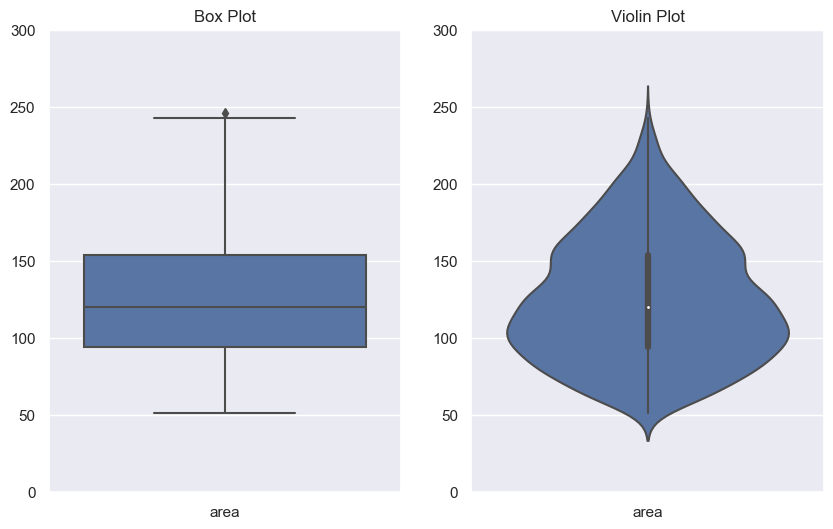

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustando o tamanho padrão das imagens e fontes
sns.set(font_scale=1.0, rc={
    "figure.figsize": (10, 6),
})

ax = plt.subplot(121)
sns.boxplot(data=dados[["area"]], ax=ax)
plt.title("Box Plot"); plt.ylim([0, 300]);

ax = plt.subplot(122)
sns.violinplot(data=dados[["area"]], ax=ax)
plt.title("Violin Plot"); plt.ylim([0, 300]);

Podemos utilizar o argumento `hue` do `seaborn` para segmentar visualizações por categorias distintas com o emprego de cores.

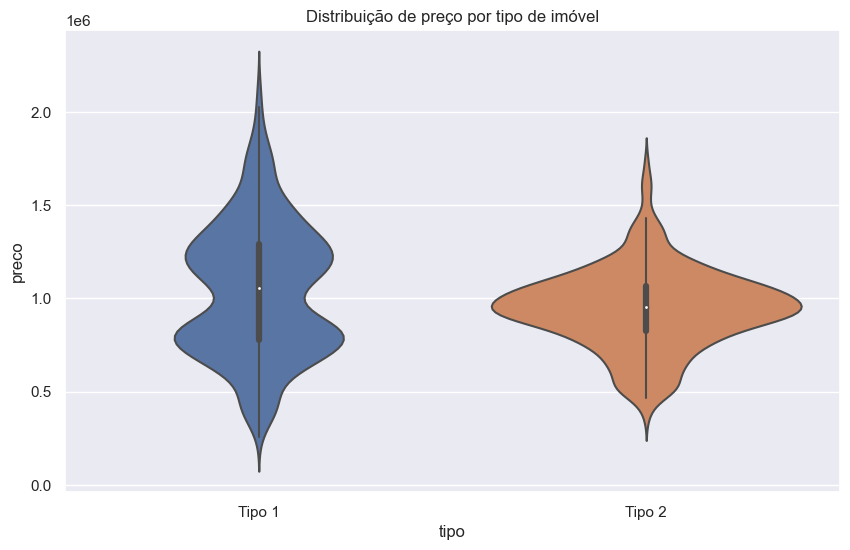

In [14]:
fig, ax = plt.subplots()
sns.violinplot(
    data=dados[dados.tipo.isin(["Tipo 1", "Tipo 2"])][["preco", "tipo"]], 
    y="preco", 
    x="tipo", 
    ax=ax
)
plt.title("Distribuição de preço por tipo de imóvel");

Além da distribuição das variáveis do nosso conjunto de dados (Análise Descritiva Univariada), podemos explorar relações entre pares utilizando a visualização `pairplot` do `seaborn` (Análise Descritiva Multivariada), que combina Funções de Densidade de Probabilidade (FDP, em inglês, *Probability Density Function*) com Gráficos de Disperção (`scatterplot`), como demonstrado na célula a seguir.

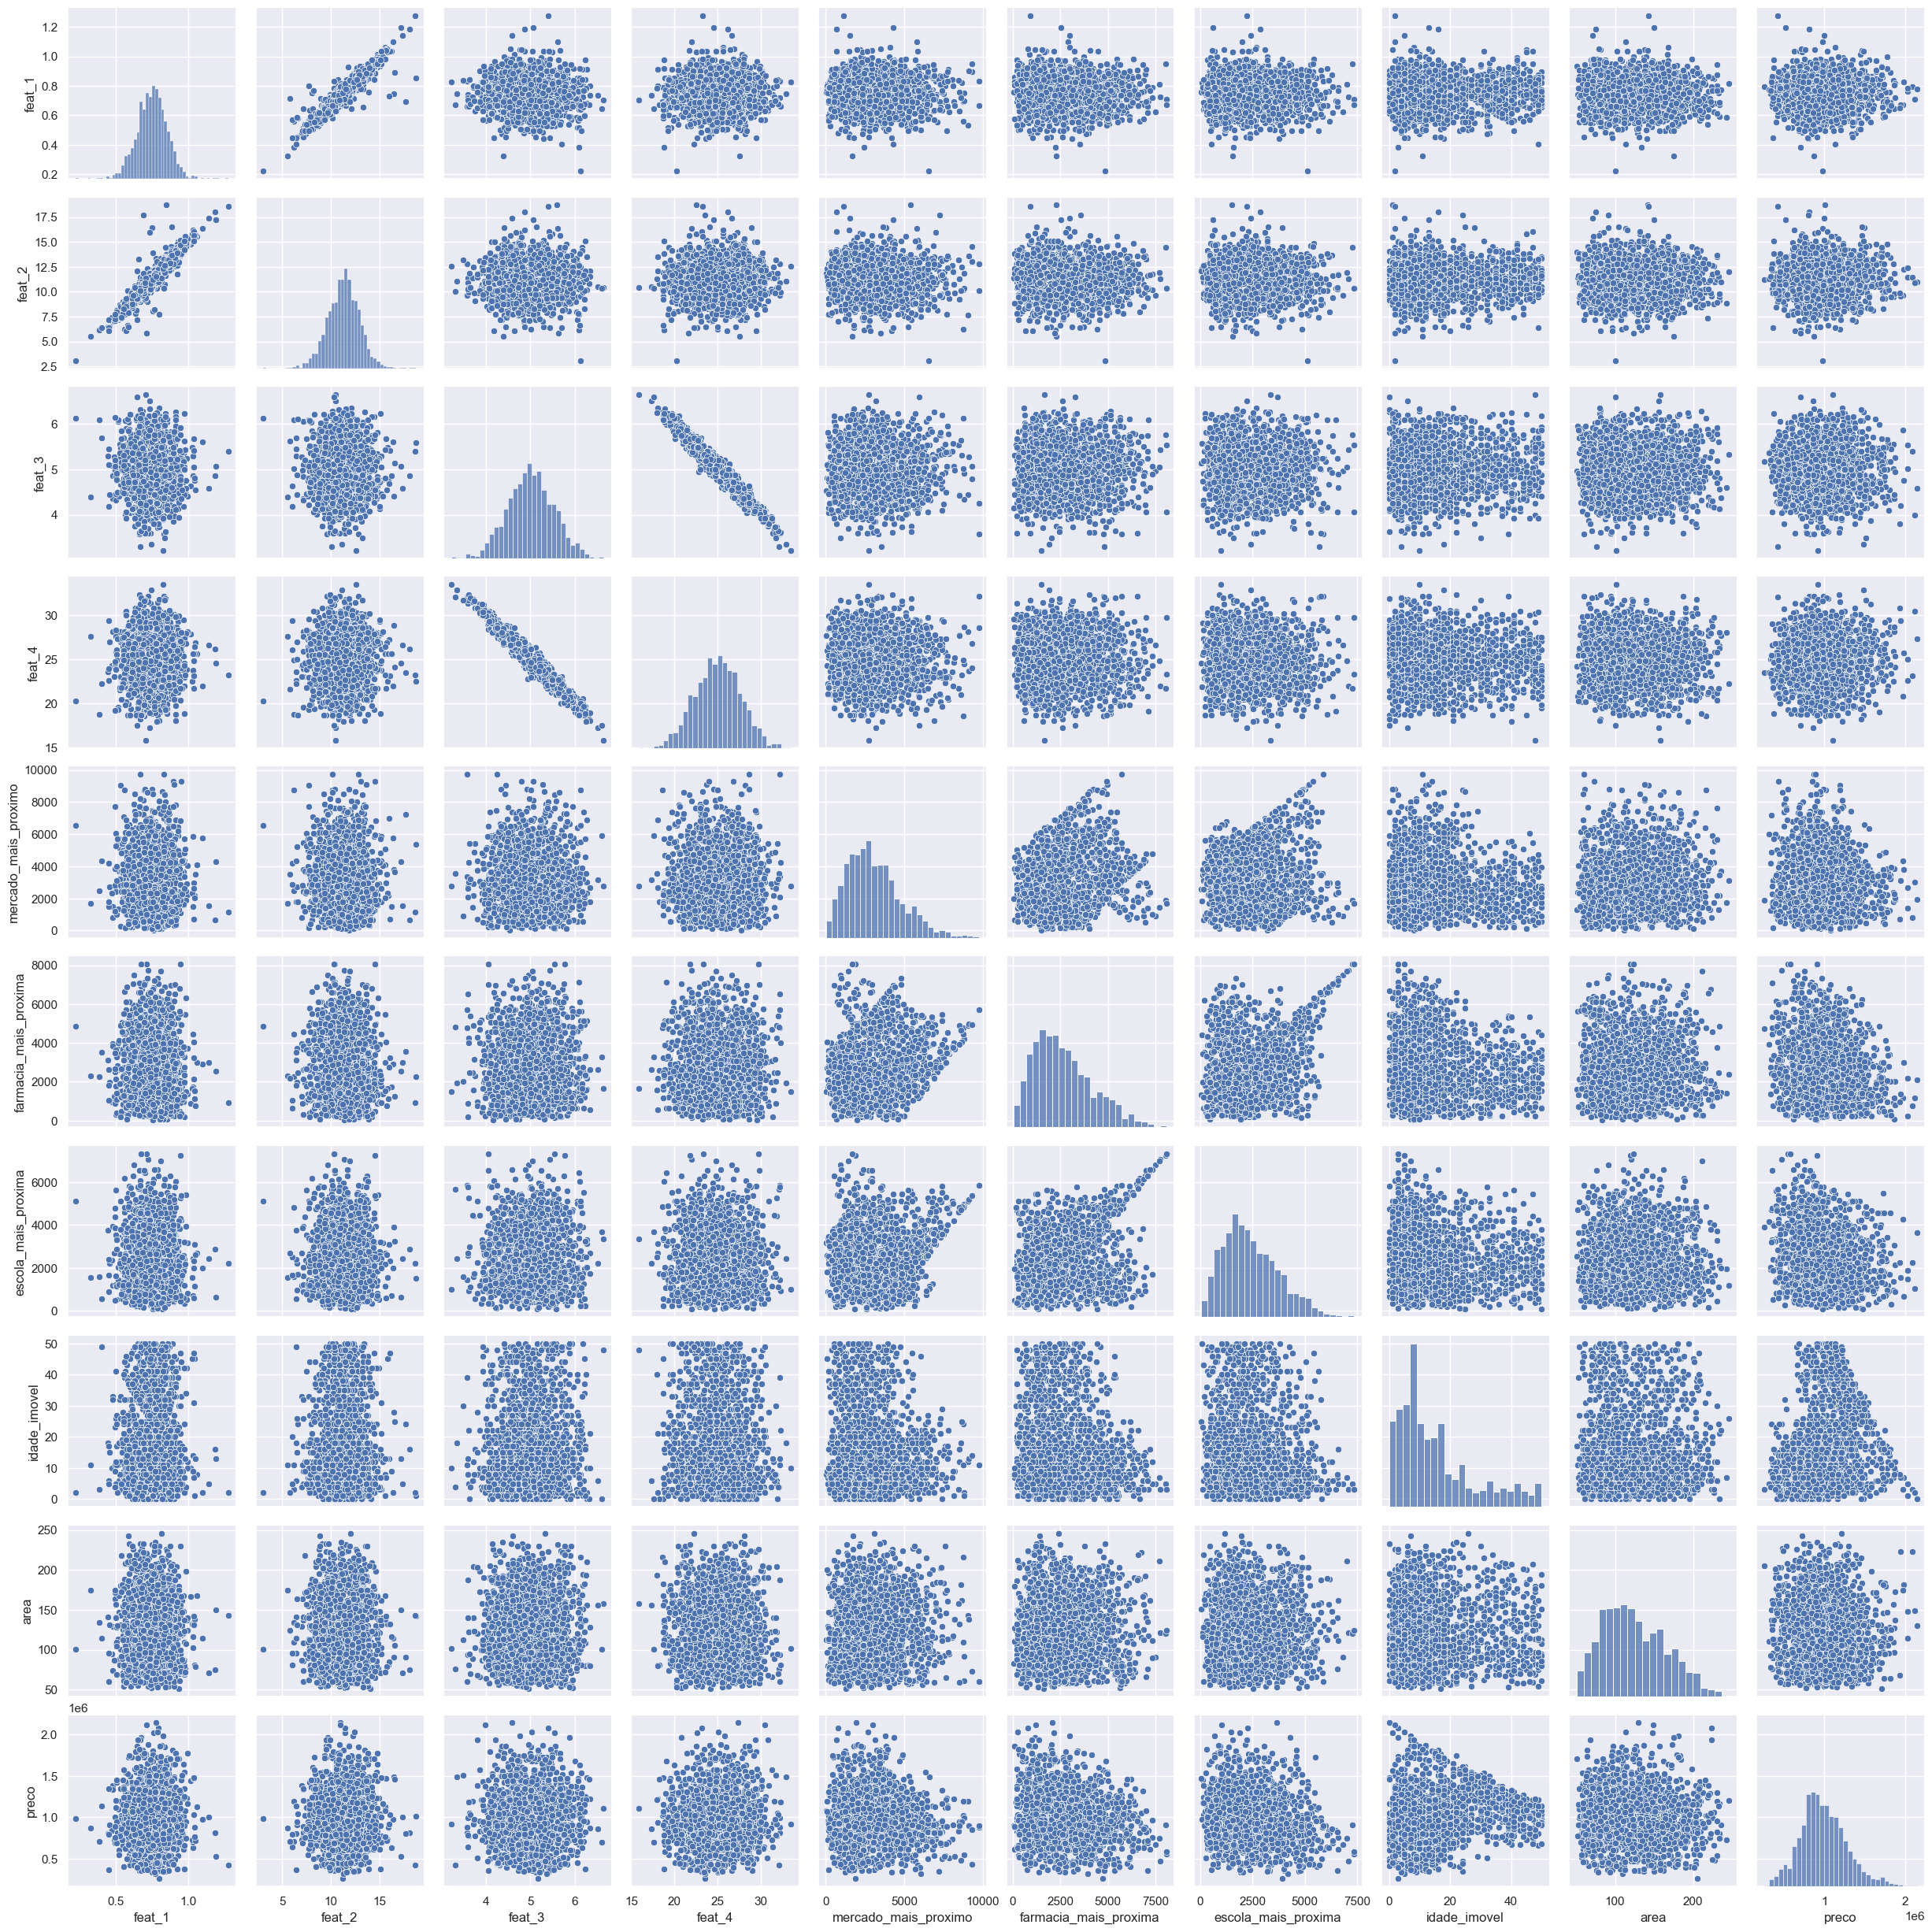

In [15]:
# A função .drop descarta algumas colunas do nosso DataFrame
sns.pairplot(
    dados.drop(columns=["loc_x", "loc_y", "num_penit_4km", "num_penit_500m"])
)

Utilizando a função `corr` do **Pandas**, junto com a visualização de mapa de calor do `heatmap` do `seaborn`, é possível criar um correlograma para mensurar, visualmente, as correlações entre as variáveis do conjunto de dados. Um adendo: a função `corr` admite apenas valores numéricos. Para contornar esse problema, podemos usar a função `select_dtypes` com o argumento `exclude="object"` para selecionar todas as colunas em que o tipo é diferente de `object`, ou seja, apenas as colunas que contém valores numéricos.

<Axes: >

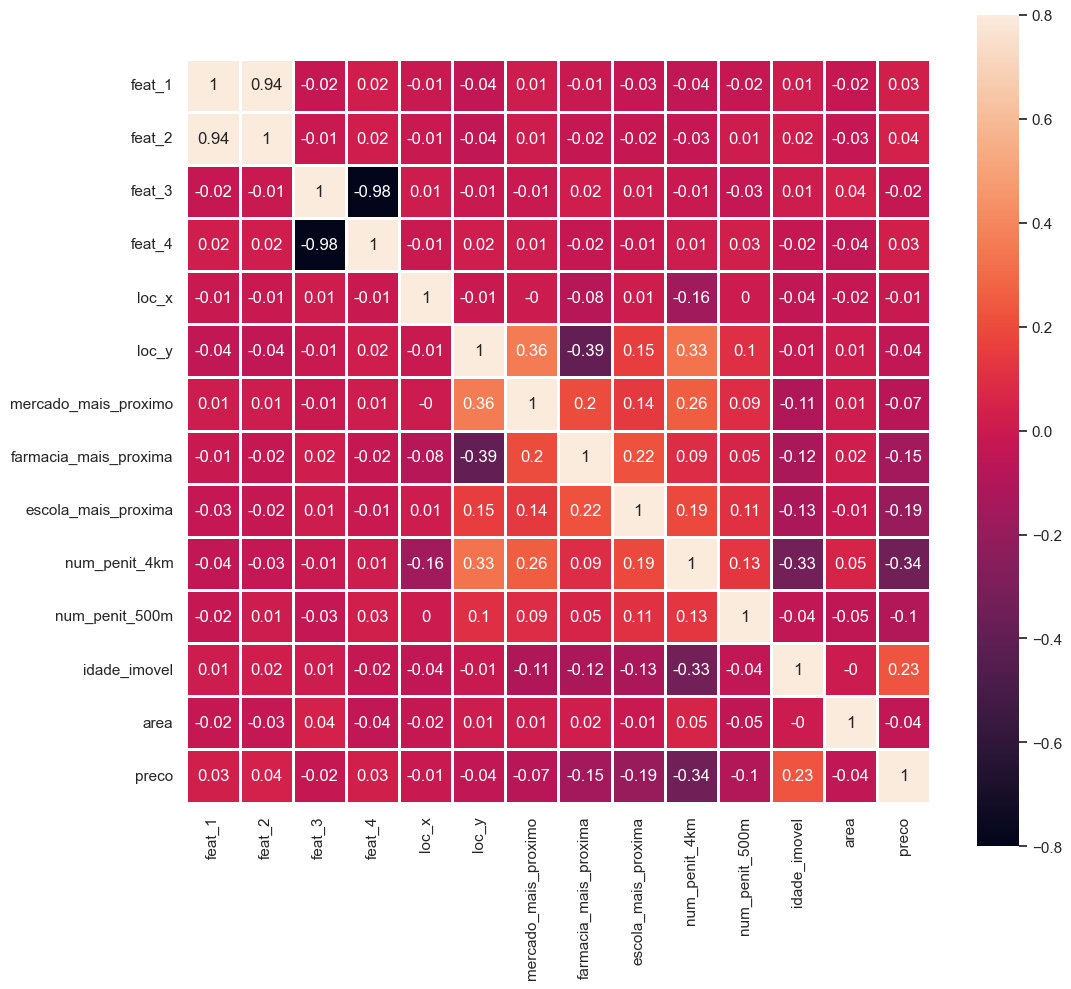

In [16]:
corr = dados.select_dtypes(exclude="object").corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, 
            annot=True,
            square=True, 
            vmax=.8,
            vmin=-.8,
            linewidths=2, 
            cbar_kws={"shrink": .9})

3 - Exercício
=============

O conjunto de arquivos de dados imobiliários contém erros sistemáticos, dados faltantes e outliers.

**Atividades**:

- Padronize as variáveis categóricas **tipo** e **cod_localidade**, remova as linhas com erros sistemáticos, e remove possíveis outliers (tipos ou localidades com frequência baixa);
- Para cada registro da base de dados, encontre a **regiao** por meio da coluna **uf** utilizando a base de estados do ibge disponibilizada para o exercício; 
- Realize a imputação de dados sobre as variáveis **feat_1**, **feat_2**, **feat_3** e **feat_4** utilizando regressão linear simples. Lembre-se que a partir da análise exploratória dos dados observa-se que **feat_1** tem correlação com **feat_2**, assim como **feat_3** tem correlação com **feat_4**, ou seja, precisamos encontrar duas equações:
  - $feat_1 = k_1 + c_1 feat_2$
  - $feat_3 = k_2 + c_2 feat_4$
- Remova os outliers dos pares de variáveis (**feat_1**, **feat_2**) e (**feat_3**, **feat_4**) utilizando o método z-score multidimensional;
- Identifique se existem outras variávies do conjunto com outliers, e, caso existam, remova os outliers citando a natureza da variável e o méteodo utilizado para identificação dos outliers;
- Após finalizar as atividades citadas anteriormente, remova todos os dados faltantes ainda presentes no conjunto de dados;
- Realize uma análise exploratória completa do conjunto de dados tratado;
- Salve o arquivo final em formato **parquet** com o nome *dados_tratados.parquet*;

**Informações adicionais**:

O prazo total para entrega do exercício é de 8 dias corridos, iniciando contagem a partir da data de disponibilização do exercício no Moodle;

A entrega deve ser feita no Moodle. Contudo, o exercício pode ser entregue em um arquivo comprimido **OU** via link compartilhado de um *fork* do projeto no github (ou alguma outra ferramenta de versionamento de código). Fica a critério do aluno escolher a melhor forma de entrega;

O arquivo (ou repositório git) da entrega, deve conter, obrigatóriamente:
- Uma cópia deste notebook (`exercicio.ipynb`) com a resolução das atividades;
- O arquivo `dados_tratados.parquet`, resultando do tratamento final da base de dados;

In [17]:
############################
#Início exercicio - Emerson#
############################

Padronize as variáveis categóricas tipo e cod_localidade, remova as linhas com erros sistemáticos, e remove possíveis outliers (tipos ou localidades com frequência baixa);

In [18]:
#verificando a contagem decada tipo - Nota-se que existem erros na classificação
dados['tipo'].value_counts()

tipo
Tipo 2           970
Tipo 1           858
tipo 2            32
tipo 1            31
TIPO 1            24
TIPO 2            18
Tipo 3             6
Localidade 9       4
Localidade 8       4
Localidade 6       4
Tipo 4             4
LOCALIDADE 6       1
Localidade 10      1
Localidade 5       1
TIPO 4             1
tipo 3             1
Localidade 7       1
Name: count, dtype: int64

In [19]:
#verificar também para a classe localidade. Também há diferença na classificação correta
dados['cod_localidade'].value_counts()

cod_localidade
Localidade 3     463
Localidade 4     457
Localidade 2     453
Localidade 1     438
LOCALIDADE 2      16
localidade 1      16
localidade 4      15
localidade 2      14
LOCALIDADE 4      10
localidade 3       9
LOCALIDADE 1       9
LOCALIDADE 3       8
Tipo 2             7
Tipo 3             6
Localidade 8       6
Tipo 4             5
Localidade 7       4
Localidade 6       3
Localidade 9       2
Localidade 5       2
localidade 9       1
localidade 5       1
Localidade 10      1
tipo 4             1
localidade 7       1
Name: count, dtype: int64

In [20]:
#vamos agora converter todos os textos para maiusculo.
#eliminar os campos com valores nulos.
#eliminar os outloers, que são valores sujos
#cod localidade com tipagem e tipo com localidade

In [21]:
#convertendo tudo para maiusculo
dados['cod_localidade'] = dados['cod_localidade'].str.upper()
#e
dados['tipo'] = dados['tipo'].str.upper()
dados

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0     RJ  TIPO 1   LOCALIDADE 4  0.620648   9.967806  4.990882  25.124844  \
1     SP  TIPO 2   LOCALIDADE 4  0.817642  12.629695  5.466835  23.444343   
2     RJ  TIPO 2   LOCALIDADE 3  0.793080  11.292156  4.201919  28.230731   
3     SC  TIPO 1   LOCALIDADE 4  0.792435  11.563047  5.459777  22.414837   
4     RN  TIPO 1   LOCALIDADE 3  0.711696  11.655785  4.891314  25.451251   
...   ..     ...            ...       ...        ...       ...        ...   
2022  SC  TIPO 2   LOCALIDADE 4  0.923722  13.940390  5.222921  24.202279   
2023  PR  TIPO 2   LOCALIDADE 4  0.621180   9.638953  4.872834  26.311889   
2024  ES  TIPO 1   LOCALIDADE 3  0.702689  10.906394  5.002910  24.681539   
2025  SC  TIPO 1         TIPO 3  0.840306  12.612464  5.191198  23.653668   
2026  CE  TIPO 2   LOCALIDADE 1  0.780135  11.537751  4.873889  26.015937   

         loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
0     0.081382  0.727021           3603.941384            2002.686030  \
1     0.367980  0.145812           2185.209139             683.811862   
2     0.332654  0.432904           1025.698339             957.451552   
3     0.159663  0.884596                   NaN            3723.067390   
4     0.156154  0.836320           3925.306331             705.807343   
...        ...       ...                   ...                    ...   
2022  0.047978  0.106754           1835.793637            1085.880075   
2023  0.146383  0.696719           3241.890776            1942.810024   
2024  0.998298  0.747620           3207.183221            1425.618869   
2025  0.565233  0.801478           2574.736799            1223.924147   
2026  0.835390  0.302851           4390.423348            2626.528938   

      escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
0             1124.043113            0.0             0.0           NaN  123.0  \
1             2462.825432            0.0             0.0          13.0  143.0   
2             1049.112117            0.0             0.0          12.0  150.0   
3             1296.121182            0.0             0.0           8.0  160.0   
4             4178.062758            0.0             0.0          12.0  134.0   
...                   ...            ...             ...           ...    ...   
2022          1389.476784            0.0             0.0           3.0  160.0   
2023          1713.583735            0.0             0.0           6.0   88.0   
2024          1571.548396            0.0             0.0          40.0   97.0   
2025           150.881637            0.0             0.0          43.0  128.0   
2026          1230.964520            0.0             0.0           5.0  119.0   

        preco  
0     1348017  
1      926601  
2     1627474  
3     1201041  
4     1444848  
...       ...  
2022   889177  
2023   863004  
2024  1322275  
2025  1170550  
2026   791071  

[2027 rows x 17 columns]

In [22]:
#eliminar valores nulos
dados = dados[~dados[["tipo","cod_localidade"]].isna().any(axis=1)]
dados

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0     RJ  TIPO 1   LOCALIDADE 4  0.620648   9.967806  4.990882  25.124844  \
1     SP  TIPO 2   LOCALIDADE 4  0.817642  12.629695  5.466835  23.444343   
2     RJ  TIPO 2   LOCALIDADE 3  0.793080  11.292156  4.201919  28.230731   
3     SC  TIPO 1   LOCALIDADE 4  0.792435  11.563047  5.459777  22.414837   
4     RN  TIPO 1   LOCALIDADE 3  0.711696  11.655785  4.891314  25.451251   
...   ..     ...            ...       ...        ...       ...        ...   
2022  SC  TIPO 2   LOCALIDADE 4  0.923722  13.940390  5.222921  24.202279   
2023  PR  TIPO 2   LOCALIDADE 4  0.621180   9.638953  4.872834  26.311889   
2024  ES  TIPO 1   LOCALIDADE 3  0.702689  10.906394  5.002910  24.681539   
2025  SC  TIPO 1         TIPO 3  0.840306  12.612464  5.191198  23.653668   
2026  CE  TIPO 2   LOCALIDADE 1  0.780135  11.537751  4.873889  26.015937   

         loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
0     0.081382  0.727021           3603.941384            2002.686030  \
1     0.367980  0.145812           2185.209139             683.811862   
2     0.332654  0.432904           1025.698339             957.451552   
3     0.159663  0.884596                   NaN            3723.067390   
4     0.156154  0.836320           3925.306331             705.807343   
...        ...       ...                   ...                    ...   
2022  0.047978  0.106754           1835.793637            1085.880075   
2023  0.146383  0.696719           3241.890776            1942.810024   
2024  0.998298  0.747620           3207.183221            1425.618869   
2025  0.565233  0.801478           2574.736799            1223.924147   
2026  0.835390  0.302851           4390.423348            2626.528938   

      escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
0             1124.043113            0.0             0.0           NaN  123.0  \
1             2462.825432            0.0             0.0          13.0  143.0   
2             1049.112117            0.0             0.0          12.0  150.0   
3             1296.121182            0.0             0.0           8.0  160.0   
4             4178.062758            0.0             0.0          12.0  134.0   
...                   ...            ...             ...           ...    ...   
2022          1389.476784            0.0             0.0           3.0  160.0   
2023          1713.583735            0.0             0.0           6.0   88.0   
2024          1571.548396            0.0             0.0          40.0   97.0   
2025           150.881637            0.0             0.0          43.0  128.0   
2026          1230.964520            0.0             0.0           5.0  119.0   

        preco  
0     1348017  
1      926601  
2     1627474  
3     1201041  
4     1444848  
...       ...  
2022   889177  
2023   863004  
2024  1322275  
2025  1170550  
2026   791071  

[1884 rows x 17 columns]

In [23]:
#agora limpar os outliers, dados sujos
dados = dados[dados['cod_localidade'].str.contains('LOCALIDADE', na=False)]
#e
dados = dados[dados['tipo'].str.contains('TIPO', na=False)]
dados

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0     RJ  TIPO 1   LOCALIDADE 4  0.620648   9.967806  4.990882  25.124844  \
1     SP  TIPO 2   LOCALIDADE 4  0.817642  12.629695  5.466835  23.444343   
2     RJ  TIPO 2   LOCALIDADE 3  0.793080  11.292156  4.201919  28.230731   
3     SC  TIPO 1   LOCALIDADE 4  0.792435  11.563047  5.459777  22.414837   
4     RN  TIPO 1   LOCALIDADE 3  0.711696  11.655785  4.891314  25.451251   
...   ..     ...            ...       ...        ...       ...        ...   
2021  PR  TIPO 2   LOCALIDADE 4  0.668155  10.123632  4.246941  28.606965   
2022  SC  TIPO 2   LOCALIDADE 4  0.923722  13.940390  5.222921  24.202279   
2023  PR  TIPO 2   LOCALIDADE 4  0.621180   9.638953  4.872834  26.311889   
2024  ES  TIPO 1   LOCALIDADE 3  0.702689  10.906394  5.002910  24.681539   
2026  CE  TIPO 2   LOCALIDADE 1  0.780135  11.537751  4.873889  26.015937   

         loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima   
0     0.081382  0.727021           3603.941384            2002.686030  \
1     0.367980  0.145812           2185.209139             683.811862   
2     0.332654  0.432904           1025.698339             957.451552   
3     0.159663  0.884596                   NaN            3723.067390   
4     0.156154  0.836320           3925.306331             705.807343   
...        ...       ...                   ...                    ...   
2021  0.997017  0.993196           9733.443096            5699.450783   
2022  0.047978  0.106754           1835.793637            1085.880075   
2023  0.146383  0.696719           3241.890776            1942.810024   
2024  0.998298  0.747620           3207.183221            1425.618869   
2026  0.835390  0.302851           4390.423348            2626.528938   

      escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area   
0             1124.043113            0.0             0.0           NaN  123.0  \
1             2462.825432            0.0             0.0          13.0  143.0   
2             1049.112117            0.0             0.0          12.0  150.0   
3             1296.121182            0.0             0.0           8.0  160.0   
4             4178.062758            0.0             0.0          12.0  134.0   
...                   ...            ...             ...           ...    ...   
2021          5854.673341            0.0             0.0          11.0   60.0   
2022          1389.476784            0.0             0.0           3.0  160.0   
2023          1713.583735            0.0             0.0           6.0   88.0   
2024          1571.548396            0.0             0.0          40.0   97.0   
2026          1230.964520            0.0             0.0           5.0  119.0   

        preco  
0     1348017  
1      926601  
2     1627474  
3     1201041  
4     1444848  
...       ...  
2021   892590  
2022   889177  
2023   863004  
2024  1322275  
2026   791071  

[1849 rows x 17 columns]

In [24]:
#dados['tipo'].value_counts()
dados['cod_localidade'].value_counts()

#Agooora sim, tudo padronizado, sem nulos e sem dados sujos
#mas ainda da pra remover as que tem menos registros(outliers), vamos la
#Tipo, remover tipo 3 e 4
#localidade, 5 ao 10

cod_localidade
LOCALIDADE 4     464
LOCALIDADE 2     462
LOCALIDADE 3     460
LOCALIDADE 1     443
LOCALIDADE 7       5
LOCALIDADE 8       5
LOCALIDADE 9       3
LOCALIDADE 5       3
LOCALIDADE 6       3
LOCALIDADE 10      1
Name: count, dtype: int64

In [25]:
dados = dados[~dados['cod_localidade'].isin(['LOCALIDADE 7', 'LOCALIDADE 8', 'LOCALIDADE 9', 'LOCALIDADE 5', 'LOCALIDADE 6', 'LOCALIDADE 10'])]
dados['cod_localidade'].value_counts()
#agora sim!!

cod_localidade
LOCALIDADE 4    464
LOCALIDADE 2    462
LOCALIDADE 3    460
LOCALIDADE 1    443
Name: count, dtype: int64

In [26]:
#o mesmo para tipo
dados = dados[~dados['tipo'].isin(['TIPO 3', 'TIPO 4'])]
dados['tipo'].value_counts()

#melhor!! agora só os valores que possuem valor significativo para a estatística

tipo
TIPO 2    970
TIPO 1    849
Name: count, dtype: int64

Para cada registro da base de dados, encontre a regiao por meio da coluna uf utilizando a base de estados do ibge disponibilizada para o exercício;

In [27]:
#para isso precisamos primeiro importar a base de estados do IBGE
estados_IBGE = pd.read_csv("estados.csv")
estados_IBGE

cod_uf_ibge               estado  uf               regiao  qtd_municipios
0            41               PARANA  PR           REGIAO SUL             399
1            42       SANTA CATARINA  SC           REGIAO SUL             295
2            43    RIO GRANDE DO SUL  RS           REGIAO SUL             497
3            15                 PARA  PA         REGIAO NORTE             144
4            13             AMAZONAS  AM         REGIAO NORTE              62
5            17            TOCANTINS  TO         REGIAO NORTE             139
6            11             RONDONIA  RO         REGIAO NORTE              52
7            14              RORAIMA  RR         REGIAO NORTE              15
8            16                AMAPA  AP         REGIAO NORTE              16
9            12                 ACRE  AC         REGIAO NORTE              22
10           32       ESPIRITO SANTO  ES       REGIAO SUDESTE              78
11           35            SAO PAULO  SP       REGIAO SUDESTE             645
12           33       RIO DE JANEIRO  RJ       REGIAO SUDESTE              92
13           31         MINAS GERAIS  MG       REGIAO SUDESTE             853
14           26           PERNAMBUCO  PE      REGIAO NORDESTE             185
15           28              SERGIPE  SE      REGIAO NORDESTE              75
16           21             MARANHAO  MA      REGIAO NORDESTE             217
17           29                BAHIA  BA      REGIAO NORDESTE             417
18           22                PIAUI  PI      REGIAO NORDESTE             224
19           24  RIO GRANDE DO NORTE  RN      REGIAO NORDESTE             167
20           23                CEARA  CE      REGIAO NORDESTE             184
21           27              ALAGOAS  AL      REGIAO NORDESTE             102
22           25              PARAIBA  PB      REGIAO NORDESTE             223
23           52                GOIAS  GO  REGIAO CENTRO-OESTE             246
24           51          MATO GROSSO  MT  REGIAO CENTRO-OESTE             141
25           53     DISTRITO FEDERAL  DF  REGIAO CENTRO-OESTE               1
26           50   MATO GROSSO DO SUL  MS  REGIAO CENTRO-OESTE              79

In [28]:
#bora fazer o merge destes DFs usando Pandas. Será usado o UF como chave
dados = pd.merge(dados, estados_IBGE, left_on="uf", right_on="uf")


In [29]:
dados.head(10)
#agora temos a região para cara registro no DF dados =D

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0  RJ  TIPO 1   LOCALIDADE 4  0.620648   9.967806  4.990882  25.124844  \
1  RJ  TIPO 2   LOCALIDADE 3  0.793080  11.292156  4.201919  28.230731   
2  RJ  TIPO 2   LOCALIDADE 4  0.818565  11.774955  5.534822  22.244092   
3  RJ  TIPO 1   LOCALIDADE 2  0.829732  12.389537  4.308029  27.963391   
4  RJ  TIPO 1   LOCALIDADE 2  0.755011  11.187500  5.669620  22.454980   
5  RJ  TIPO 1   LOCALIDADE 2  0.801762  11.770365  5.262367  24.459082   
6  RJ  TIPO 2   LOCALIDADE 1  0.827131  10.401739  3.896580  30.057138   
7  RJ  TIPO 2   LOCALIDADE 4  0.826390  12.348060  4.483604  27.833712   
8  RJ  TIPO 1   LOCALIDADE 4  0.976626  14.146866  5.379368  22.959410   
9  RJ  TIPO 2   LOCALIDADE 1  0.596007   8.808524  4.251583  28.914591   

      loc_x     loc_y  mercado_mais_proximo  ...  escola_mais_proxima   
0  0.081382  0.727021           3603.941384  ...          1124.043113  \
1  0.332654  0.432904           1025.698339  ...          1049.112117   
2  0.134680  0.377766            127.836347  ...           902.005755   
3  0.121374  0.857395           6019.435781  ...          4321.701839   
4  0.227741  0.890048           5751.943515  ...          3571.715352   
5  0.846366  0.811257           2385.336793  ...          3592.784643   
6  0.422951  0.133550           2763.987709  ...           348.970027   
7  0.938113  0.614614           6150.026386  ...          2627.442959   
8  0.063358  0.856569           4911.014422  ...           330.841060   
9  0.452682  0.424238           1328.592846  ...          1980.265054   

   num_penit_4km  num_penit_500m  idade_imovel   area    preco  cod_uf_ibge   
0            0.0             0.0           NaN  123.0  1348017           33  \
1            0.0             0.0          12.0  150.0  1627474           33   
2            0.0             0.0           7.0   80.0   952444           33   
3            1.0             0.0           3.0  131.0   871423           33   
4            1.0             0.0           7.0  132.0   867297           33   
5            1.0             0.0          15.0  118.0   709426           33   
6            1.0             0.0           4.0  100.0  1213158           33   
7            0.0             0.0           7.0  124.0   945169           33   
8            0.0             0.0           4.0   87.0  1349055           33   
9            1.0             0.0          13.0  123.0  1051240           33   

           estado          regiao qtd_municipios  
0  RIO DE JANEIRO  REGIAO SUDESTE             92  
1  RIO DE JANEIRO  REGIAO SUDESTE             92  
2  RIO DE JANEIRO  REGIAO SUDESTE             92  
3  RIO DE JANEIRO  REGIAO SUDESTE             92  
4  RIO DE JANEIRO  REGIAO SUDESTE             92  
5  RIO DE JANEIRO  REGIAO SUDESTE             92  
6  RIO DE JANEIRO  REGIAO SUDESTE             92  
7  RIO DE JANEIRO  REGIAO SUDESTE             92  
8  RIO DE JANEIRO  REGIAO SUDESTE             92  
9  RIO DE JANEIRO  REGIAO SUDESTE             92  

[10 rows x 21 columns]

Realize a imputação de dados sobre as variáveis feat_1, feat_2, feat_3 e feat_4 utilizando regressão linear simples. Lembre-se que a partir da análise exploratória dos dados observa-se que feat_1 tem correlação com feat_2, assim como feat_3 tem correlação com feat_4, ou seja, precisamos encontrar duas equações:
𝑓𝑒𝑎𝑡1=𝑘1+𝑐1𝑓𝑒𝑎𝑡2
 
𝑓𝑒𝑎𝑡3=𝑘2+𝑐2𝑓𝑒𝑎𝑡4

In [30]:
#será que existem dados nulos apos o merge? vamos ver
#dados.feat_1.isna().sum()#5
#dados.feat_2.isna().sum()#4
#dados.feat_3.isna().sum()#11
dados.feat_4.isna().sum()#4
#tem pra todos mas quantos nulos existem para cada feat

4

In [31]:
sum(dados.feat_1.isna() & dados.feat_2.isna())

0

In [32]:
sum(dados.feat_3.isna() & dados.feat_4.isna())

1

In [33]:
#O exercicio pede para realizarmos a imputação de dados via regressão linear simples
#ou seja treinar um modelo para preencher os valores nulos com predição
#mas precisaria visto que são poucos nulos? Nao seria melhor apagar(ListWise)
dados

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
0     RJ  TIPO 1   LOCALIDADE 4  0.620648   9.967806  4.990882  25.124844  \
1     RJ  TIPO 2   LOCALIDADE 3  0.793080  11.292156  4.201919  28.230731   
2     RJ  TIPO 2   LOCALIDADE 4  0.818565  11.774955  5.534822  22.244092   
3     RJ  TIPO 1   LOCALIDADE 2  0.829732  12.389537  4.308029  27.963391   
4     RJ  TIPO 1   LOCALIDADE 2  0.755011  11.187500  5.669620  22.454980   
...   ..     ...            ...       ...        ...       ...        ...   
1802  PA  TIPO 2   LOCALIDADE 3  0.686323  10.123452  5.574733  21.783614   
1803  PA  TIPO 1   LOCALIDADE 2  0.746937  11.243941  4.354049  28.262029   
1804  PA  TIPO 1   LOCALIDADE 2  0.726285  10.263513  5.533333  21.906949   
1805  PA  TIPO 2   LOCALIDADE 1  0.737028  11.256775  5.249753  24.195390   
1806  PA  TIPO 2   LOCALIDADE 1  0.861918  13.195726  4.904734  24.930581   

         loc_x     loc_y  mercado_mais_proximo  ...  escola_mais_proxima   
0     0.081382  0.727021           3603.941384  ...          1124.043113  \
1     0.332654  0.432904           1025.698339  ...          1049.112117   
2     0.134680  0.377766            127.836347  ...           902.005755   
3     0.121374  0.857395           6019.435781  ...          4321.701839   
4     0.227741  0.890048           5751.943515  ...          3571.715352   
...        ...       ...                   ...  ...                  ...   
1802  0.539481  0.808467           2736.962561  ...           379.020034   
1803  0.553043  0.296343           1052.391436  ...          2251.368834   
1804  0.414511  0.449990           1225.804451  ...          2466.477891   
1805  0.028447  0.451345           3014.321444  ...          4228.138582   
1806  0.985792  0.744716            385.176751  ...          3446.457453   

      num_penit_4km  num_penit_500m  idade_imovel   area    preco   
0               0.0             0.0           NaN  123.0  1348017  \
1               0.0             0.0          12.0  150.0  1627474   
2               0.0             0.0           7.0   80.0   952444   
3               1.0             0.0           3.0  131.0   871423   
4               1.0             0.0           7.0  132.0   867297   
...             ...             ...           ...    ...      ...   
1802            0.0             0.0          10.0  169.0  1224763   
1803            0.0             0.0           0.0   88.0   466585   
1804            1.0             0.0           1.0   83.0   454757   
1805            1.0             0.0          18.0   85.0   598985   
1806            0.0             0.0          20.0  168.0   692164   

      cod_uf_ibge          estado          regiao qtd_municipios  
0              33  RIO DE JANEIRO  REGIAO SUDESTE             92  
1              33  RIO DE JANEIRO  REGIAO SUDESTE             92  
2              33  RIO DE JANEIRO  REGIAO SUDESTE             92  
3              33  RIO DE JANEIRO  REGIAO SUDESTE             92  
4              33  RIO DE JANEIRO  REGIAO SUDESTE             92  
...           ...             ...             ...            ...  
1802           15            PARA    REGIAO NORTE            144  
1803           15            PARA    REGIAO NORTE            144  
1804           15            PARA    REGIAO NORTE            144  
1805           15            PARA    REGIAO NORTE            144  
1806           15            PARA    REGIAO NORTE            144  

[1807 rows x 21 columns]

In [34]:
#realizando ajuste(imputação de dados) de dados nulos usando
#regressão linear simples para o Feat_1 e 2
#precisaremos do NUMPY

import numpy as np

#selecionando dados nulos dos feat1 e 2
dados_RLS01 = dados[~dados[["feat_1","feat_2"]].isna().any(axis=1)].copy()

#definindo array do NUMPY com os valores do FEAT1
y1 = dados_RLS01.feat_1.values
#definindo array do NUMPY com os valores do FEAT2
x1 = dados_RLS01.feat_2.values
#definindo terceiro array const_01 com o mesmo tamanho de Y_01 e preenchido com valores 1
const_01 = np.ones(len(y1))

#criando matriz transposta com os dados empilhados verticalmente
mat01 = np.vstack([const_01,x1]).T
#Calculando os coeficientes K1 e C1 da regressão linear usando as funções linalg.pinv e .dot
k1,c1 = np.linalg.pinv(mat01).dot(y1)

#Preenchendo dados nulos com base nos coeficientes calculados
dados.loc[dados.feat_1.isna(),"feat_1"] = k1 + c1*dados.feat_2
dados.loc[dados.feat_2.isna(),"feat_2"] = (dados.feat_1 - k1)/c1


dados.isna().sum(axis=0)
#ainda tem valores nulos para Feat 3 e 4, bora fazer o mesmo para eles

uf                        0
tipo                      0
cod_localidade            0
feat_1                    0
feat_2                    0
feat_3                   11
feat_4                    4
loc_x                     6
loc_y                     2
mercado_mais_proximo     63
farmacia_mais_proxima    58
escola_mais_proxima      58
num_penit_4km             8
num_penit_500m            2
idade_imovel              5
area                     48
preco                     0
cod_uf_ibge               0
estado                    0
regiao                    0
qtd_municipios            0
dtype: int64

In [35]:
#selecionando dados nulos dos feat3 e 4
dados_RLS02 = dados[~dados[["feat_3","feat_4"]].isna().any(axis=1)].copy()

#definindo array do NUMPY com os valores do FEAT3
y2 = dados_RLS02.feat_3.values
#definindo array do NUMPY com os valores do FEAT4
x2 = dados_RLS02.feat_4.values
#definindo terceiro array const_02 com o mesmo tamanho de Y_01 e preenchido com valores 1
const_02 = np.ones(len(y2))

#criando matriz transposta com os dados empilhados verticalmente
mat02 = np.vstack([const_02,x2]).T
#Calculando os coeficientes K2 e C2 da regressão linear usando as funções linalg.pinv e .dot
k2,c2 = np.linalg.pinv(mat02).dot(y2)

#Preenchendo dados nulos com base nos coeficientes calculados
dados.loc[dados.feat_3.isna(),"feat_3"] = k2 + c2*dados.feat_4
dados.loc[dados.feat_4.isna(),"feat_4"] = (dados.feat_3 - k2)/c2


dados.isna().sum(axis=0)

uf                        0
tipo                      0
cod_localidade            0
feat_1                    0
feat_2                    0
feat_3                    1
feat_4                    1
loc_x                     6
loc_y                     2
mercado_mais_proximo     63
farmacia_mais_proxima    58
escola_mais_proxima      58
num_penit_4km             8
num_penit_500m            2
idade_imovel              5
area                     48
preco                     0
cod_uf_ibge               0
estado                    0
regiao                    0
qtd_municipios            0
dtype: int64

In [36]:
#ainda ficou uma linha no feat 3 e feat 4 nula. vamos apagar
dados = dados[~(dados.feat_3.isna() & dados.feat_4.isna())]
dados.isna().sum(axis=0)
#agora sim, dados inputados

uf                        0
tipo                      0
cod_localidade            0
feat_1                    0
feat_2                    0
feat_3                    0
feat_4                    0
loc_x                     6
loc_y                     2
mercado_mais_proximo     63
farmacia_mais_proxima    58
escola_mais_proxima      58
num_penit_4km             8
num_penit_500m            2
idade_imovel              5
area                     48
preco                     0
cod_uf_ibge               0
estado                    0
regiao                    0
qtd_municipios            0
dtype: int64

Remova os outliers dos pares de variáveis (feat_1, feat_2) e (feat_3, feat_4) utilizando o método z-score multidimensional;

<Axes: xlabel='feat_2', ylabel='feat_1'>

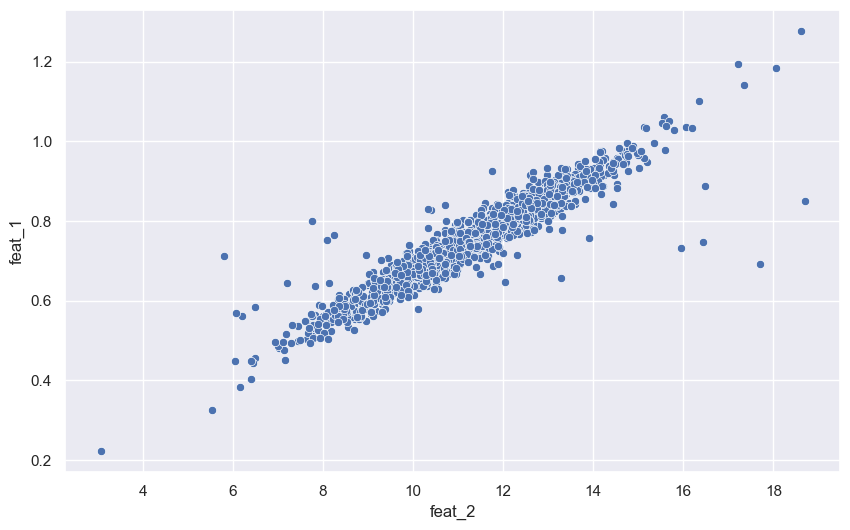

In [37]:
sns.scatterplot(x = dados.feat_2,y = dados.feat_1)
#AINDA com muitos outliers

Texto copiado do Adicional_Outliers
A receita de bolo para a filtragem de um conjunto de variáveis aleatórias (que seguem distribuição normal) é dado por:

Passo 1: Calcule a média de cada variável aleatória;
Passo 2: Calcule a matriz de variância-covariância do conjunto de variáveis aleatórias;
Passo 3: Encontre os auto-vetores da matriz de variância-covariância;
Passo 4: Subtraia o valor médio, calculado no Passo 1, das observações originais (Translação);
Passo 5: Rotacione as observações transladadas utilizando a matriz formada pelas auto-vetores encontrados no Passo 3 (Rotação);
Passo 6: Estardardize as observações rotacionadas para que a variância de cada eixo seja igual à 1 (Estandardização);
Passo 7: Calcule a distância de cada ponto estandardizado à origem, e utilize-o para filtrar os dados. A distância pode ser interpretada como o Z-Score de uma análise unidimensional (Filtragem);

In [38]:
#Funções eigsorted e plot_cov_ellipse copiadas do arquivo adicional_outliers.ypnb

def eigsorted(cov):
    """
    Encontra os auto-valores e auto-vetores de uma matriz de variância-covariância.
    Os auto-valores e auto-vetores nos ajudam a normalizar amostras de distribuições
    multivariadas.
    
    :cov: Matriz de variância-covariância.
    """
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
    
def plot_cov_ellipse(mean, cov, nstd=2, ax=None, **kwargs):
    """
    Função utiliada para desenhar uma elipse que representa o intervalo
    de confiança de uma distribuição bivariada (Gaussiana em duas dimensões).
    
    :mean: Ponto central da elipse (gaussiana bivariada)
    :cov: Matrix de variância-covariância da distribuição gaussiana bivariada
    :nstd: Limite de confiança, em termos de desvios padrões
    :ax: Handler em que a elipse deve ser desenhada
    """


    if ax is None:
        ax = plt.gca()
    
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [39]:
#funções definidas, precisamos agora montar uma matriz de covariancia para
#obter medias de covariancia usando numpy usando função np.cov
matCov1 = np.cov(dados.feat_1,dados.feat_2)
#calcular media dos valores para ft1 ft2 e armazenar em medft1/2
medFt1 = np.mean(dados.feat_1)
medFt2 = np.mean(dados.feat_2)

#usando a funçaoeigsorted para encontrar autovalores e autovetores para
#normalizar amostrasmultivariadas
autoValores1, autoVetores1 = eigsorted(matCov1)
#subtraindo a média dos feats 1 e 2 
outFt1 = dados.feat_1.copy() - medFt1
outFt2 = dados.feat_2.copy() - medFt2

In [40]:
#ja fizemos os passos de 1 a 4, agora faremos o passo 5 que é rotacionar a matriz
rot1 = np.vstack([outFt1,outFt2]).T.dot(autoVetores1)
#agora vamos normalizar/estandardizar os valores desta tabela rotacionada
rot1_norm = rot1 / np.sqrt(np.diag(np.cov(rot1,rowvar=0)))
out1 = np.sqrt((rot1_norm ** 2).sum(axis=1)) > 2.5
dados = dados.loc[~out1, :]

<Axes: xlabel='feat_1', ylabel='feat_2'>

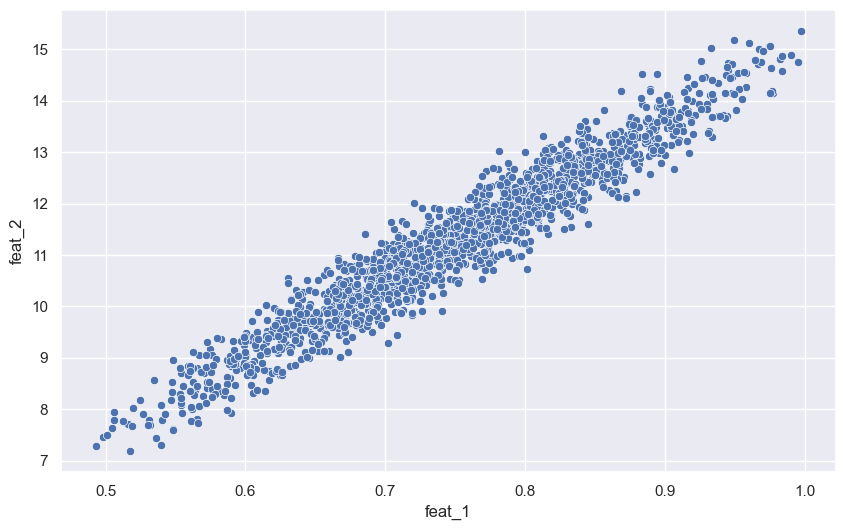

In [41]:
#agora um novo scatterplot para ver se os outliers sairam
sns.scatterplot(x = dados.feat_1,y = dados.feat_2)
# pronto sem outliers para os Feat1 e 2

<Axes: xlabel='feat_3', ylabel='feat_4'>

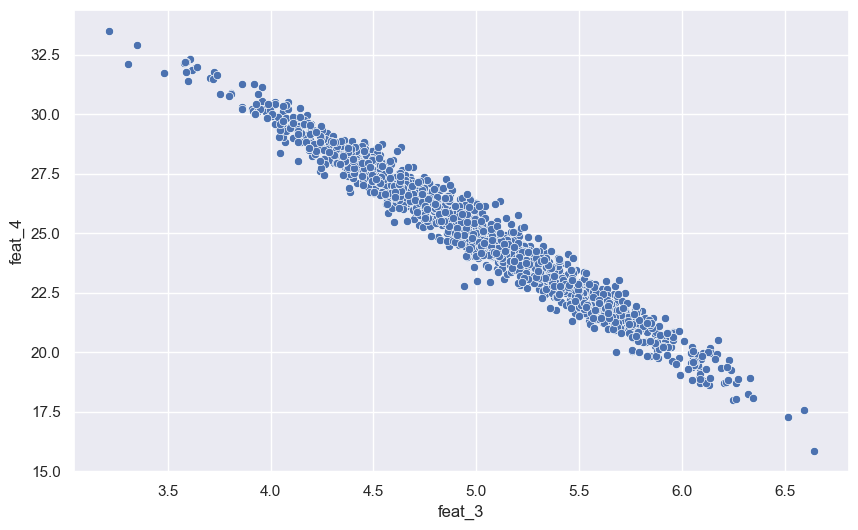

In [42]:
#precisamos fazer o mesmo para os feats 3 e 4
#iniciar com um scatterplot para ver os outliers
sns.scatterplot(x = dados.feat_3,y = dados.feat_4)
#menos Outliers que os feat1 e 2 mas ainda com muitos outliers



In [43]:
#mesmo processo anterior mas agora para ft3 e 4
matCov2 = np.cov(dados.feat_3,dados.feat_4)
#calcular media dos valores para ft3 ft4 e armazenar em medft3/4
medFt3 = np.mean(dados.feat_3)
medFt4 = np.mean(dados.feat_4)

#usando a funçaoeigsorted para encontrar autovalores e autovetores para
#normalizar amostrasmultivariadas
autoValores2, autoVetores2 = eigsorted(matCov2)
#subtraindo a média dos feats 1 e 2 
outFt3 = dados.feat_3.copy() - medFt3
outFt4 = dados.feat_4.copy() - medFt4

In [44]:
#rotacionar, seguindo os passos da receita de bolo
rot2 = np.vstack([outFt3,outFt4]).T.dot(autoVetores2)
#agora vamos normalizar/estandardizar os valores desta tabela rotacionada
rot2_norm = rot2 / np.sqrt(np.diag(np.cov(rot2,rowvar=0)))
out2 = np.sqrt((rot2_norm ** 2).sum(axis=1)) > 2.5
dados = dados.loc[~out2, :]

<Axes: xlabel='feat_4', ylabel='feat_3'>

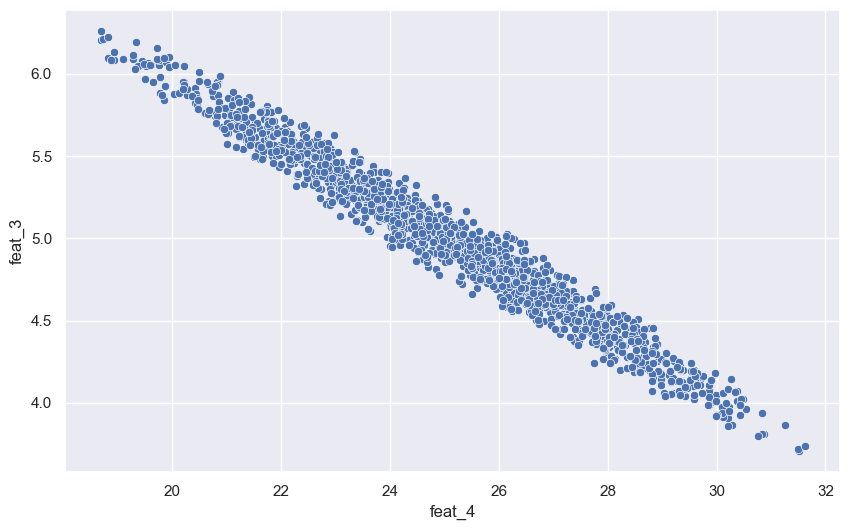

In [45]:
#por fim, vemos o mesmo scatter, agora sem outliers
sns.scatterplot(x = dados.feat_4,y = dados.feat_3)

Identifique se existem outras variávies do conjunto com outliers, e, caso existam, remova os outliers citando a natureza da variável e o méteodo utilizado para identificação dos outliers

In [46]:
dados['nulos'] = dados.isnull().any(axis=1)
nulos_count = dados['nulos'].sum()
print('Registros sem valores:', nulos_count)


Registros sem valores: 216


Após finalizar as atividades citadas anteriormente, remova todos os dados faltantes ainda presentes no conjunto de dados

In [47]:
#removendo na força bruta todos os registros nulos
dados = dados.dropna()
nulos_sum = dados.isnull().sum(axis=0)
print(nulos_sum)


uf                       0
tipo                     0
cod_localidade           0
feat_1                   0
feat_2                   0
feat_3                   0
feat_4                   0
loc_x                    0
loc_y                    0
mercado_mais_proximo     0
farmacia_mais_proxima    0
escola_mais_proxima      0
num_penit_4km            0
num_penit_500m           0
idade_imovel             0
area                     0
preco                    0
cod_uf_ibge              0
estado                   0
regiao                   0
qtd_municipios           0
nulos                    0
dtype: int64


Realize uma análise exploratória completa do conjunto de dados tratado;
Salve o arquivo final em formato parquet com o nome dados_tratados.parquet;

In [48]:
dados.head(10)
#22 colunas de informação

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4   
1   RJ  TIPO 2   LOCALIDADE 3  0.793080  11.292156  4.201919  28.230731  \
2   RJ  TIPO 2   LOCALIDADE 4  0.818565  11.774955  5.534822  22.244092   
3   RJ  TIPO 1   LOCALIDADE 2  0.829732  12.389537  4.308029  27.963391   
4   RJ  TIPO 1   LOCALIDADE 2  0.755011  11.187500  5.669620  22.454980   
5   RJ  TIPO 1   LOCALIDADE 2  0.801762  11.770365  5.262367  24.459082   
7   RJ  TIPO 2   LOCALIDADE 4  0.826390  12.348060  4.483604  27.833712   
8   RJ  TIPO 1   LOCALIDADE 4  0.976626  14.146866  5.379368  22.959410   
9   RJ  TIPO 2   LOCALIDADE 1  0.596007   8.808524  4.251583  28.914591   
10  RJ  TIPO 2   LOCALIDADE 1  0.651554   9.261166  4.903888  25.996111   
11  RJ  TIPO 2   LOCALIDADE 1  0.837179  12.913026  4.815406  25.891265   

       loc_x     loc_y  mercado_mais_proximo  ...  num_penit_4km   
1   0.332654  0.432904           1025.698339  ...            0.0  \
2   0.134680  0.377766            127.836347  ...            0.0   
3   0.121374  0.857395           6019.435781  ...            1.0   
4   0.227741  0.890048           5751.943515  ...            1.0   
5   0.846366  0.811257           2385.336793  ...            1.0   
7   0.938113  0.614614           6150.026386  ...            0.0   
8   0.063358  0.856569           4911.014422  ...            0.0   
9   0.452682  0.424238           1328.592846  ...            1.0   
10  0.814043  0.329730           4197.197946  ...            0.0   
11  0.590531  0.081390           4090.446176  ...            0.0   

    num_penit_500m  idade_imovel   area    preco  cod_uf_ibge          estado   
1              0.0          12.0  150.0  1627474           33  RIO DE JANEIRO  \
2              0.0           7.0   80.0   952444           33  RIO DE JANEIRO   
3              0.0           3.0  131.0   871423           33  RIO DE JANEIRO   
4              0.0           7.0  132.0   867297           33  RIO DE JANEIRO   
5              0.0          15.0  118.0   709426           33  RIO DE JANEIRO   
7              0.0           7.0  124.0   945169           33  RIO DE JANEIRO   
8              0.0           4.0   87.0  1349055           33  RIO DE JANEIRO   
9              0.0          13.0  123.0  1051240           33  RIO DE JANEIRO   
10             0.0           4.0  151.0  1165647           33  RIO DE JANEIRO   
11             0.0          14.0   58.0  1099521           33  RIO DE JANEIRO   

            regiao qtd_municipios  nulos  
1   REGIAO SUDESTE             92  False  
2   REGIAO SUDESTE             92  False  
3   REGIAO SUDESTE             92  False  
4   REGIAO SUDESTE             92  False  
5   REGIAO SUDESTE             92  False  
7   REGIAO SUDESTE             92  False  
8   REGIAO SUDESTE             92  False  
9   REGIAO SUDESTE             92  False  
10  REGIAO SUDESTE             92  False  
11  REGIAO SUDESTE             92  False  

[10 rows x 22 columns]

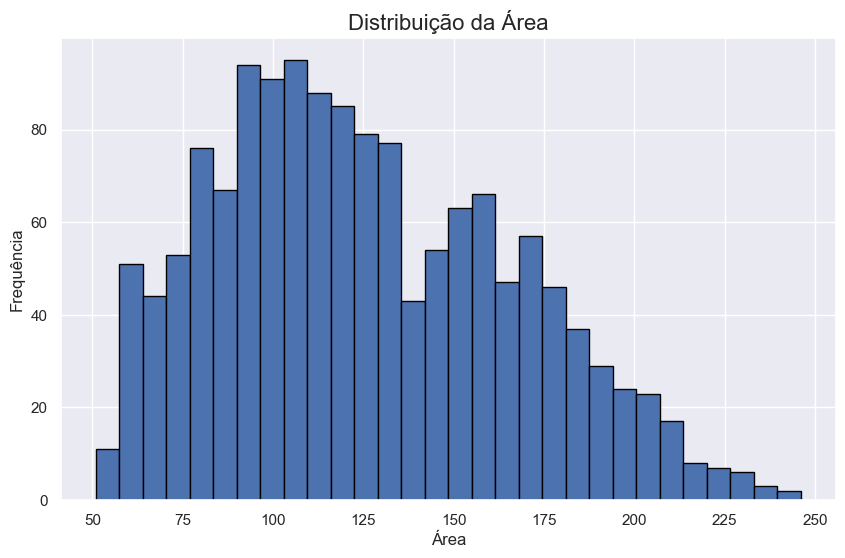

In [49]:
#histograma mostrando a distribuiçao de area, metragem
plt.figure(figsize=(10, 6)) 
plt.hist(dados['area'], bins=30, edgecolor='black')

plt.title('Distribuição da Área', fontsize=16)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


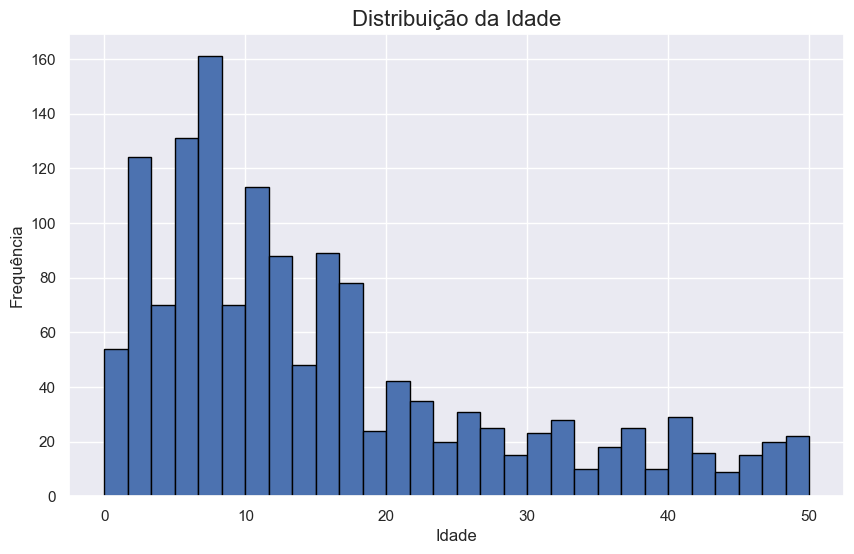

In [50]:
#histograma mostrando a idade do imóvel
plt.figure(figsize=(10, 6)) 
plt.hist(dados['idade_imovel'], bins=30, edgecolor='black')

plt.title('Distribuição da Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

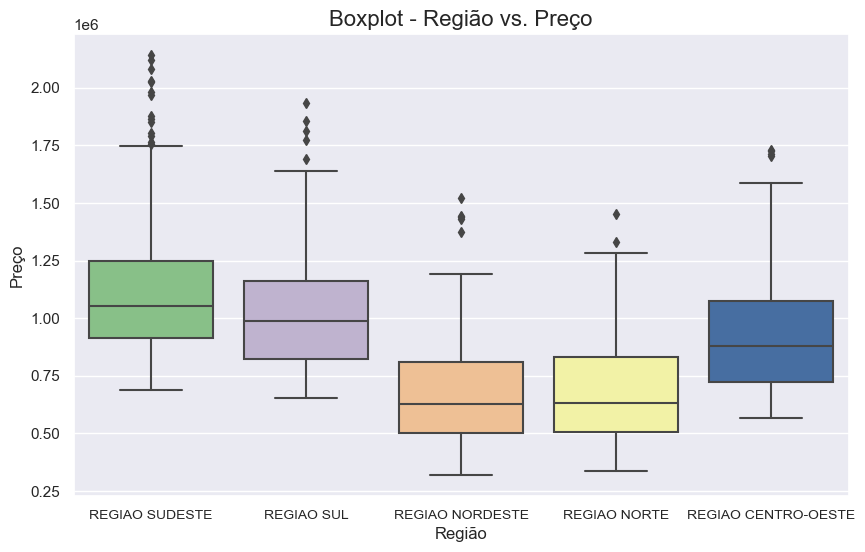

In [51]:
# boxplot para verificar quais regioes possuem maior preço do imóvel
custom_palette = sns.color_palette("Accent")

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='regiao', y='preco', data=dados, palette=custom_palette)

plt.title('Boxplot - Região vs. Preço', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.xticks(fontsize=10) 

plt.show()


In [52]:
dados.to_parquet("dados.parquet")